This notebook contains the results for the complete dataset from Austin for the year 2014.

In [1]:
import numpy as np
import pandas as pd

In [2]:
import sys

In [3]:
from common import compute_rmse_fraction

In [4]:
from plot_functions import *

In [5]:
import pickle

### Loading all the prediction files

In [6]:
knn_p= pickle.load(open("predictions/sd_knn_all_homes.pkl","r"))
tensor_custom_p = pickle.load(open("predictions/sd_o_tf.pkl",'r'))['tf']
tensor_custom_static_weather_p = pickle.load(open("predictions/sd_o_tf_energy_static.pkl",'r'))['tf_energy_static']
mf_p = pickle.load(open("predictions/sd_o_mf.pkl",'r'))['mf']
tensor_all_p = pickle.load(open("predictions/sd_o_tf_all_appliances.pkl",'r'))['tf_all_appliances']
tensor_all_static_p = pickle.load(open("predictions/sd_o_tf_all_appliances_static_weather.pkl",'r'))['tf_all_appliances_static_weather']
mf_all_p = pickle.load(open("predictions/sd_o_mf_all_appliances.pkl",'r'))['mf_all_appliances']


### KNN prediction and Sensitivity analysis

In [7]:
sanity_num_points = {}

In [8]:
knn= {}
sensitivity_knn={}
sanity_num_points = {}
for appliance in knn_p.keys()[:]:
    print(appliance)
    knn[appliance] = {}
    sensitivity_knn[appliance]={}
    sanity_num_points[appliance]={}
    for feature in ['energy', 'energy_static']:
        sanity_num_points[appliance][feature]={}
        sensitivity_knn[appliance][feature]={}
        best_error = 1e6
        for n in range(1, 10):
            pred = pd.DataFrame(knn_p[appliance][feature][n]).T

            pred_fraction, gt_fraction, error, e = compute_rmse_fraction(appliance,pred, region='SanDiego')
            assert(len(pred_fraction)==len(gt_fraction))
            sanity_num_points[appliance][feature][n]=len(pred_fraction)
            sensitivity_knn[appliance][feature][n] = error
            if error < best_error:
                best_error = error
                knn[appliance][feature] = best_error

hvac
wm
fridge
mw
oven
dw


In [9]:
pd.DataFrame(knn)

,dw,fridge,hvac,mw,oven,wm
energy,2.858569,6.530149,28.582806,2.864159,5.297116,1.051624
energy_static,2.941480,6.453205,21.982842,2.800373,4.659657,1.053803


In [10]:
pd.Panel(sanity_num_points).mean()

,dw,fridge,hvac,mw,oven,wm
energy,346.0,324.0,204.0,334.0,189.0,133.0
energy_static,346.0,324.0,204.0,334.0,189.0,133.0


In [11]:
%matplotlib inline

In [12]:
sensitivity_all = {}
sanity_all = {}

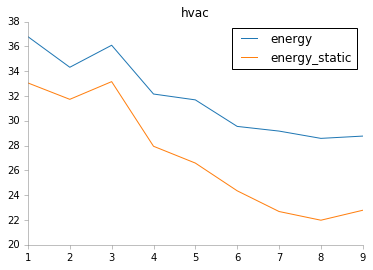

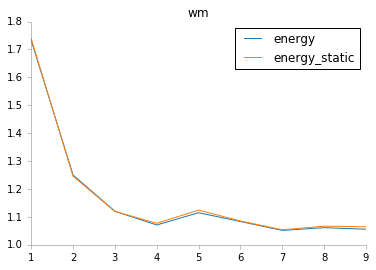

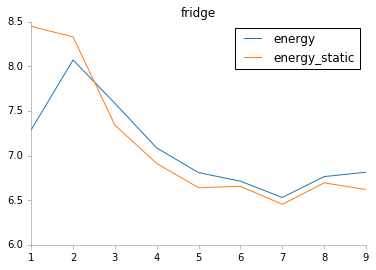

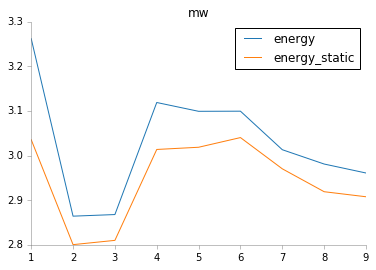

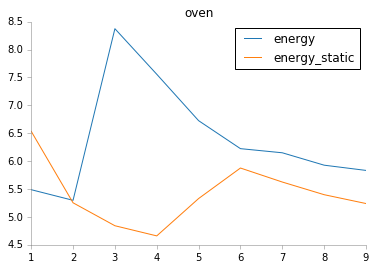

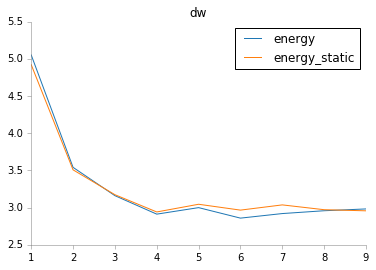

In [13]:
sensitivity = sensitivity_knn
sensitivity_all['KNN'] = sensitivity_knn
sanity_all['KNN'] = pd.Panel(sanity_num_points).mean()

for appliance in sensitivity:
    appliance_df = pd.DataFrame(sensitivity_knn[appliance])
    appliance_df.plot(title=appliance, color = tableau20blind[::2])
    format_axes(plt.gca())

### TF-1-at-a-time

In [14]:
sanity_num_points ={}
dataset = 'False'
cost = 'abs'
tf_custom= {}
sensitivity = {}
for appliance in tensor_custom_p.keys()[:]:
    print(appliance)
    sanity_num_points[appliance] = {}
    sensitivity[appliance] = {}
    tf_custom[appliance]= {}
    for case in [str(x) for x in range(1, 5)]:
        sanity_num_points[appliance][case]={}
        sensitivity[appliance][case] = {}
        best_error = 1e6
        for a in [str(x) for x in range(1, 10)]:
            alpha, beta, error, e = compute_rmse_fraction(appliance,tensor_custom_p[appliance][case][a][cost][dataset],region='SanDiego')
            assert(len(alpha)==len(beta))
            sanity_num_points[appliance][case][a]=len(alpha)
            sensitivity[appliance][case][a] = error
            if error < best_error:
                best_error = error
                tf_custom[appliance][case] = best_error

hvac
wm
fridge
mw
oven
dw


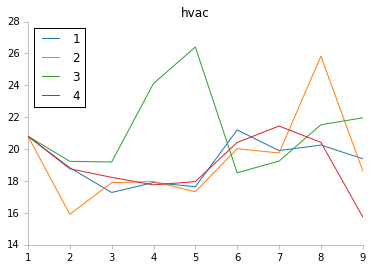

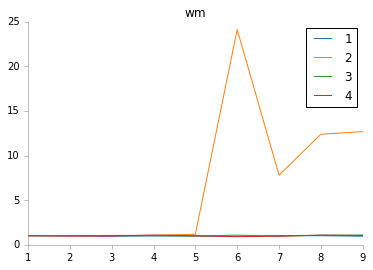

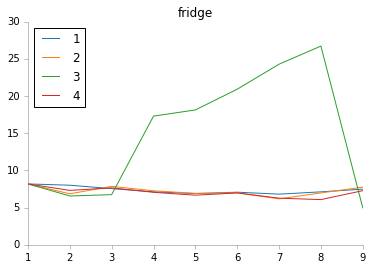

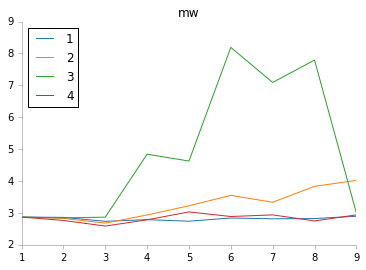

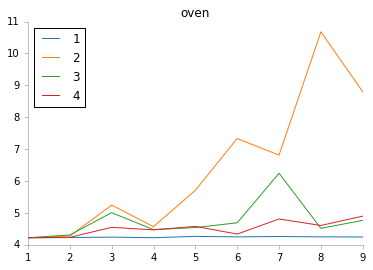

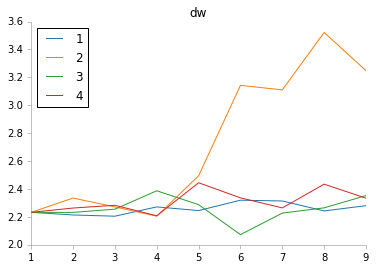

In [15]:
sensitivity_all['TF-1-at-time'] = sensitivity
sanity_all['TF-1-at-time'] = pd.Panel(sanity_num_points).mean()
for appliance in sensitivity:
    appliance_df = pd.DataFrame(sensitivity[appliance])
    appliance_df.plot(title=appliance, color=tableau20blind[::2])
    format_axes(plt.gca())

Something seems to be weird with case 2!

In [16]:
pd.Panel(sanity_num_points).mean()

,dw,fridge,hvac,mw,oven,wm
1,346.0,324.0,204.0,334.0,189.0,133.0
2,346.0,324.0,204.0,334.0,189.0,133.0
3,346.0,324.0,204.0,334.0,189.0,133.0
4,346.0,324.0,204.0,334.0,189.0,133.0


In [17]:
pd.DataFrame(tf_custom)

,dw,fridge,hvac,mw,oven,wm
1,2.205026,6.807206,17.282885,2.735960,4.219906,0.950056
2,2.205130,6.175016,15.915817,2.680090,4.219906,1.013580
3,2.072725,4.975606,18.518570,2.843821,4.219906,0.976411
4,2.207997,6.073792,15.747598,2.588147,4.219906,0.911726


### TF-all-appliances

In [18]:
dataset = 'False'
tf_custom_all= {}
cost='abs'
sanity_num_points ={}
sensitivity ={}

for appliance in tensor_custom_p.keys()[:]:
    print(appliance)
    sensitivity[appliance] = {}
    tf_custom_all[appliance]= {}
    sanity_num_points[appliance]={}
    for case in [str(x) for x in range(1, 5)]:
        sensitivity[appliance][case] = {}
        
        sanity_num_points[appliance][case]={}
        best_error = 1e6
        for a in [str(x) for x in range(1, 11)]:
            try:
                pred = tensor_all_p[appliance][case][a][cost]
                
               
                if appliance=='hvac':
                    pred = pred[range(4, 10)]
                alpha, beta, error, e = compute_rmse_fraction(appliance,pred, region='SanDiego')
                assert(len(alpha)==len(beta))
                sanity_num_points[appliance][case][a]=len(alpha)
                sensitivity[appliance][case][a] = error
                if error < best_error:
                    best_error = error
                    tf_custom_all[appliance][case] = best_error
            except Exception, e:
                print(a, appliance, e)

hvac
wm
fridge
mw
oven
dw


In [19]:
pd.DataFrame(tf_custom_all)

,dw,fridge,hvac,mw,oven,wm
1,2.152789,6.911945,13.141785,2.631254,4.230844,0.953574
2,2.246593,7.043088,13.731750,2.669660,4.230844,0.921598
3,2.190711,7.901381,17.422050,2.752236,4.230844,0.983754
4,2.246593,6.980452,12.560700,2.609721,4.230844,0.926896


In [20]:
pd.Panel(sanity_num_points).mean()

,dw,fridge,hvac,mw,oven,wm
1,346.0,324.0,204.0,334.0,189.0,133.0
2,346.0,324.0,204.0,334.0,189.0,133.0
3,346.0,324.0,204.0,334.0,189.0,133.0
4,346.0,324.0,204.0,334.0,189.0,133.0


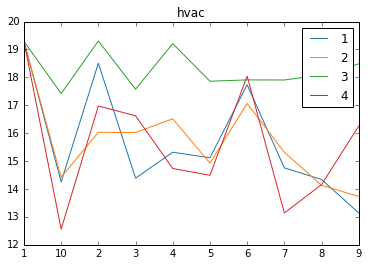

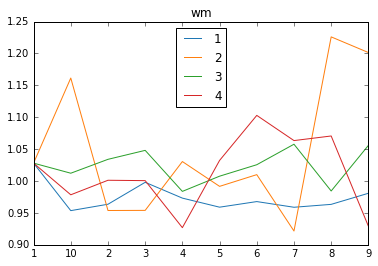

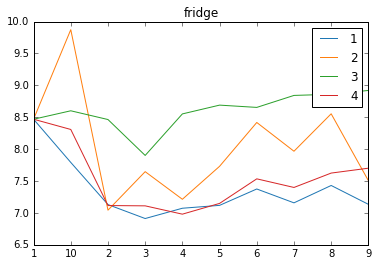

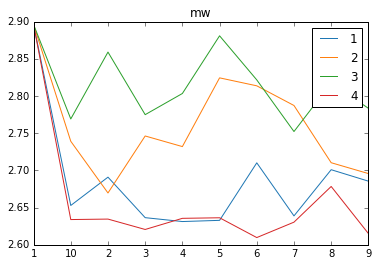

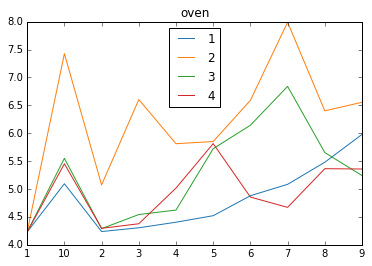

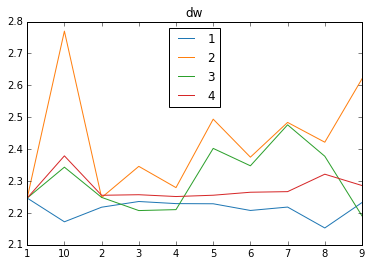

In [21]:
sensitivity_all['TF-all-appliances'] = sensitivity
sanity_all['TF-all-appliances'] = pd.Panel(sanity_num_points).mean()
for appliance in sensitivity:
    appliance_df = pd.DataFrame(sensitivity[appliance])
    appliance_df.plot(title=appliance, color=tableau20blind[::2])

### TF-1-at-time with static and weather

In [22]:
dataset = 'False'
tf_custom_static_weather= {}
cost= 'abs'
sanity_num_points = {}
sensitivity = {}
for appliance in tensor_custom_static_weather_p.keys()[:]:
    print(appliance)
    sensitivity[appliance] = {}
    sanity_num_points[appliance] = {}
    tf_custom_static_weather[appliance]= {}
    for static in ['None','static']:
        tf_custom_static_weather[appliance][static] = {}
        for weather in ['None','weather']:
            tf_custom_static_weather[appliance][static][weather] = {}
            sanity_num_points[appliance][(static, weather)] = {}

            best_error = 1e6
            sensitivity[appliance][(static, weather)] = {}
            for a in [str(x) for x in range(1, 10)]:
                alpha, beta, error, e = compute_rmse_fraction(appliance,tensor_custom_static_weather_p[appliance][dataset][a][static][weather][cost],region='SanDiego')
                assert(len(alpha)==len(beta))
                sanity_num_points[appliance][(static, weather)][a]=len(alpha)
                sensitivity[appliance][(static, weather)][a] = error
                if error < best_error:
                    best_error = error
                    tf_custom_static_weather[appliance][static][weather] = best_error

hvac
wm
fridge
mw
oven
dw


In [23]:
tf_custom_static_weather

{'dw': {'None': {'None': 2.2051303974531451, 'weather': 2.179375987209649},
  'static': {'None': 2.4166325116938863, 'weather': 2.3546064085957017}},
 'fridge': {'None': {'None': 6.175015654176125, 'weather': 6.5469696493182212},
  'static': {'None': 5.8201864001010319, 'weather': 5.6549210462502852}},
 'hvac': {'None': {'None': 15.915816757279719, 'weather': 17.668201902660179},
  'static': {'None': 17.532436727070852, 'weather': 16.552577450205785}},
 'mw': {'None': {'None': 2.6800896087240438, 'weather': 2.6668471599422836},
  'static': {'None': 2.6213681577648038, 'weather': 2.5959215809411877}},
 'oven': {'None': {'None': 4.2199061527379618, 'weather': 4.2177607064227169},
  'static': {'None': 4.6995815743472109, 'weather': 4.897863204357761}},
 'wm': {'None': {'None': 1.0135803869027324, 'weather': 0.97372549189754598},
  'static': {'None': 1.0258719917593098, 'weather': 0.99908266510864407}}}

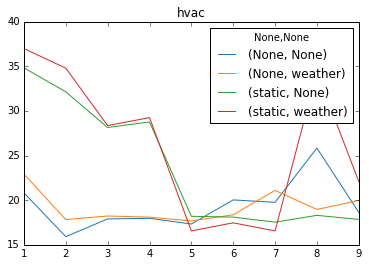

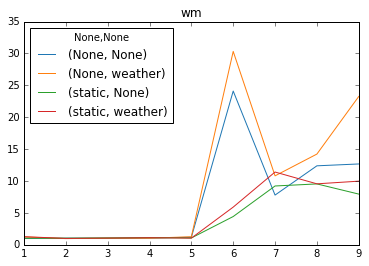

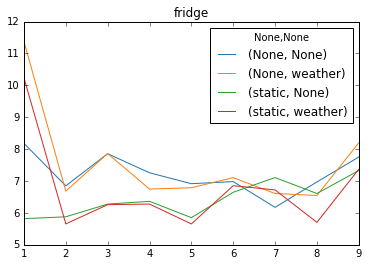

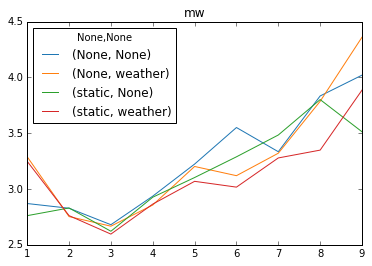

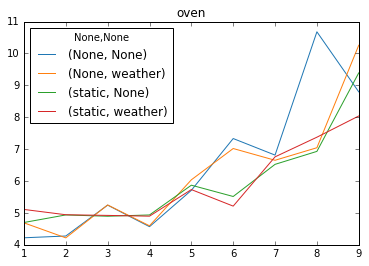

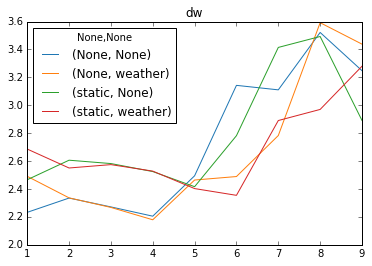

In [24]:
sensitivity_all['TF-1-at-time-static'] = sensitivity
sanity_all['TF-1-at-time-static'] = pd.Panel(sanity_num_points).mean()
for appliance in sensitivity:
    appliance_df = pd.DataFrame(sensitivity[appliance])
    appliance_df.plot(title=appliance,  color=tableau20blind[::2])

### TF-all-appliance with static and weather

In [25]:
dataset = 'False'
tf_custom_static_weather_all= {}
cost= 'abs'
sanity_num_points = {}
sensitivity = {}
for appliance in tensor_custom_static_weather_p.keys()[:]:
    print(appliance)
    sensitivity[appliance] = {}
    sanity_num_points[appliance] = {}
    tf_custom_static_weather_all[appliance]= {}
    for static in ['None','static']:
        tf_custom_static_weather_all[appliance][static] = {}
        for weather in ['None','weather']:
            tf_custom_static_weather_all[appliance][static][weather] = {}
            sanity_num_points[appliance][(static, weather)] = {}

            best_error = 1e6
            sensitivity[appliance][(static, weather)] = {}
            for a in [str(x) for x in range(1, 13)]:
                pred = tensor_all_static_p[appliance][static][weather][a]
                
                
                if appliance == 'hvac':
                    pred = pred[range(4, 10)]
                alpha, beta, error, e = compute_rmse_fraction(appliance, pred, region='SanDiego')
                assert(len(alpha) == len(beta))
                sanity_num_points[appliance][(static, weather)][a] = len(alpha)
                sensitivity[appliance][(static, weather)][a] = error
                if error < best_error:
                    best_error = error
                    tf_custom_static_weather_all[appliance][static][weather] = best_error

hvac
wm
fridge
mw
oven
dw


In [26]:
pd.Panel(sanity_num_points).mean()

dw  fridge   hvac     mw   oven     wm
None   None     346.0   324.0  204.0  334.0  189.0  133.0
       weather  346.0   324.0  204.0  334.0  189.0  133.0
static None     346.0   324.0  204.0  334.0  189.0  133.0
       weather  346.0   324.0  204.0  334.0  189.0  133.0

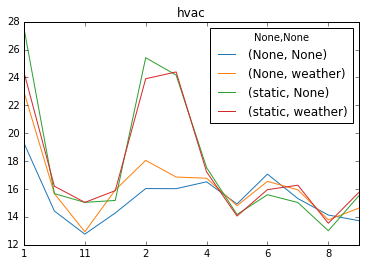

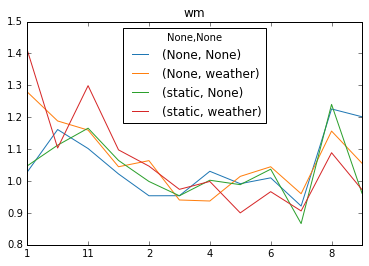

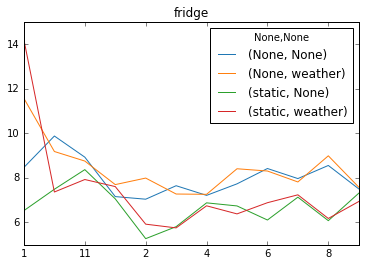

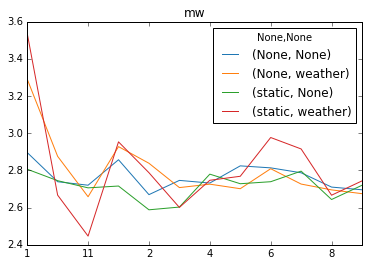

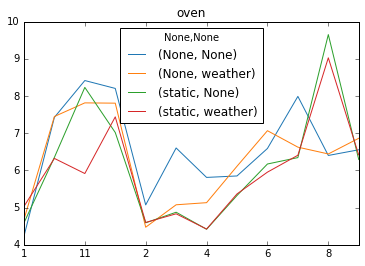

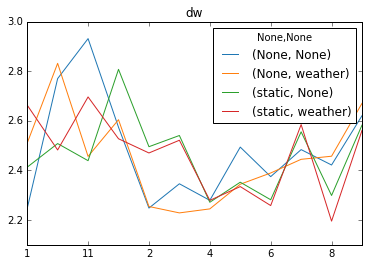

In [27]:
sensitivity_all['TF-all-appliances-static'] = sensitivity
sanity_all['TF-all-appliances-static'] = pd.Panel(sanity_num_points).mean()
for appliance in sensitivity:
    appliance_df = pd.DataFrame(sensitivity[appliance])
    appliance_df.plot(title=appliance , color=tableau20blind[::2])

### MF one at a time

In [28]:
mf_results = {}
dataset = 'False'
sanity_num_points = {}
sensitivity = {}
for appliance in mf_p:
    print(appliance)
    mf_results[appliance] = {}
    sanity_num_points[appliance] = {}
    sensitivity[appliance] = {}
    for feature in ['energy_static','energy']:
        mf_results[appliance][feature] = {}
        sensitivity[appliance][feature] = {}
        sanity_num_points[appliance][feature] = {}
        for cost in ['absolute']:
            mf_results[appliance][feature][cost] = {}

            least_error = 1000
            for lat in [str(x) for x in range(1, 10)]:
                try:
                    pred = mf_p[appliance][feature][cost][dataset][lat]
                    if appliance=="hvac":
                        pred = pred[['hvac_%d' %month for month in range(5, 11)]]
                    alpha, beta, error, e  = compute_rmse_fraction(appliance, pred, region='SanDiego')
                    sensitivity[appliance][feature][lat] = error
                    sanity_num_points[appliance][feature][lat] = len(alpha)
                    if error < least_error:
                        least_error = error
                        best_k = lat
                except Exception, e:
                    pass
            mf_results[appliance][feature][cost] = least_error

hvac
wm
fridge
mw
oven
dw


In [29]:
mf_results

{'dw': {'energy': {'absolute': 2.2391805701482186},
  'energy_static': {'absolute': 2.475783900292944}},
 'fridge': {'energy': {'absolute': 7.1006448992573414},
  'energy_static': {'absolute': 5.9901759012746068}},
 'hvac': {'energy': {'absolute': 15.775912544545397},
  'energy_static': {'absolute': 17.85420998992787}},
 'mw': {'energy': {'absolute': 2.7183897581686916},
  'energy_static': {'absolute': 2.5801892560926394}},
 'oven': {'energy': {'absolute': 4.2664739865193742},
  'energy_static': {'absolute': 4.6258789856097797}},
 'wm': {'energy': {'absolute': 0.88324229657828623},
  'energy_static': {'absolute': 0.95892206328525464}}}

In [30]:
pd.Panel(sanity_num_points).mean()

,dw,fridge,hvac,mw,oven,wm
energy,346.0,324.0,204.0,334.0,189.0,133.0
energy_static,346.0,324.0,204.0,334.0,189.0,133.0


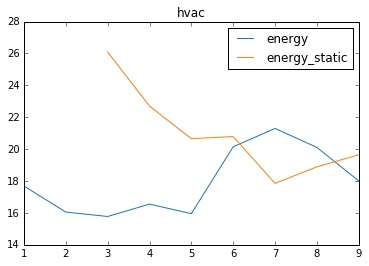

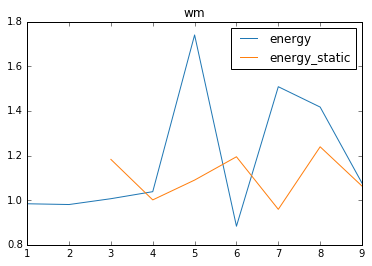

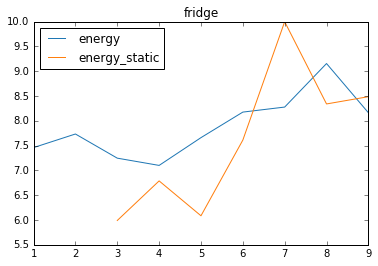

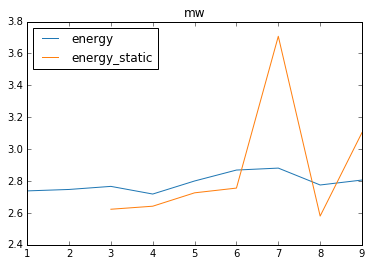

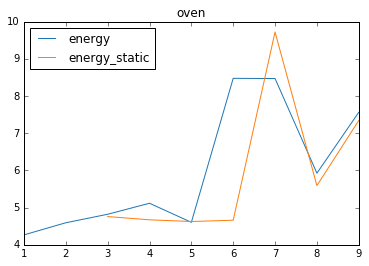

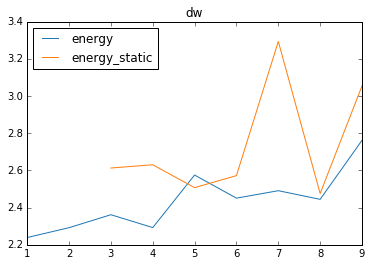

In [31]:
sensitivity_all['MF-1-at-time'] = sensitivity
sanity_all['Mf-1-at-time'] = pd.Panel(sanity_num_points).mean()
for appliance in sensitivity:
    appliance_df = pd.DataFrame(sensitivity[appliance])
    appliance_df.plot(title=appliance , color=tableau20blind[::2])

### MF all

In [32]:
mf_all_results = {}
sensitivity = {}
sanity_num_points = {}

dataset = 'False'
cost = 'absolute'
for appliance in mf_p:
    print(appliance)
    mf_all_results[appliance] = {}
    sensitivity[appliance] = {}
    sanity_num_points[appliance] = {}
    
    for feature in ['energy_static','energy']:
        mf_all_results[appliance][feature] = {}
        sensitivity[appliance][feature] = {}
        sanity_num_points[appliance][feature] = {}
        
        
        least_error = 1000
        for lat in [str(x) for x in range(1, 10)]:
            try:
                pred = mf_all_p[appliance][feature][cost][dataset][lat]
                if appliance=="hvac":
                    pred = pred[['hvac_%d' %month for month in range(5, 11)]]
                alpha, beta, error, e  = compute_rmse_fraction(appliance, pred, region='SanDiego')
                sensitivity[appliance][feature][lat] = error
                sanity_num_points[appliance][feature][lat] = len(alpha)
                
                if error < least_error:
                    least_error = error
                    best_k = lat
            except:
                pass
        mf_all_results[appliance][feature] = least_error

hvac
wm
fridge
mw
oven
dw


In [33]:
pd.DataFrame(mf_all_results)

,dw,fridge,hvac,mw,oven,wm
energy,2.228058,6.990453,14.127769,2.675803,4.229417,6.937676
energy_static,2.441908,5.836400,15.526596,2.573888,4.423364,7.341545


In [34]:
pd.Panel(sanity_num_points).mean()

,dw,fridge,hvac,mw,oven,wm
energy,346.0,324.0,204.0,334.0,189.0,133.0
energy_static,346.0,324.0,204.0,334.0,189.0,133.0


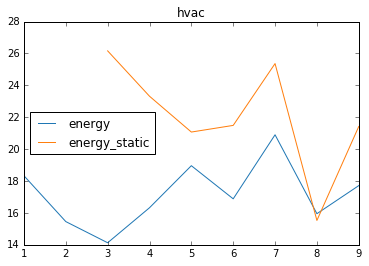

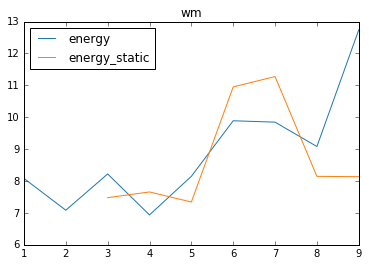

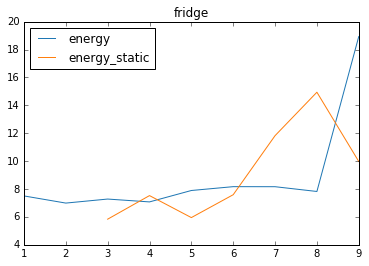

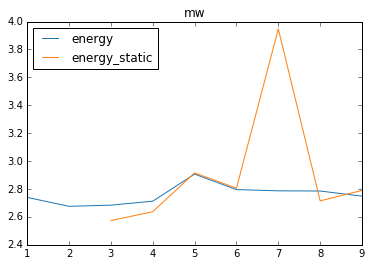

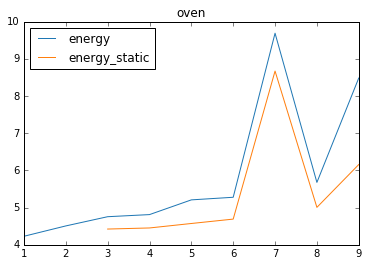

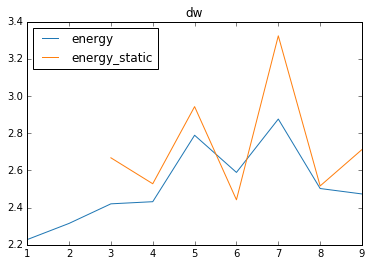

In [35]:
sensitivity_all['MF-all-appliances'] = sensitivity
sanity_all['MF-all-appliances'] = pd.Panel(sanity_num_points).mean()
for appliance in sensitivity:
    appliance_df = pd.DataFrame(sensitivity[appliance])
    appliance_df.plot(title=appliance , color=tableau20blind[::2])

In [43]:

case_2 = {}

for static in ['None','static']:
    for weather in ['None','weather']:
        case_2[(static, weather)] =  {}
        for appliance in mf_p.keys():
            max_error = 1e6
            for lat in range(1, 13):
                
                if appliance=='hvac':
                    pred = tensor_all_static_p[appliance][static][weather][str(lat)][range(4, 10)]
                else:
                    pred = tensor_all_static_p[appliance][static][weather][str(lat)]
                error = compute_rmse_fraction(appliance,pred, region='SanDiego')[2]
                if error<max_error:
                    max_error=error
                    case_2[(static, weather)][appliance]=max_error
               


In [44]:
mf_relative = {}
mf_abs = {}
for appliance in mf_results.keys():
    for cost in ['absolute']:
        if cost=="absolute":
            mf_abs[appliance] =  pd.DataFrame(mf_results[appliance]).ix[cost]
        else:
            mf_relative[appliance] =  pd.DataFrame(mf_results[appliance]).ix[cost]


In [45]:
pd.DataFrame(mf_abs)

,dw,fridge,hvac,mw,oven,wm
energy,2.239181,7.100645,15.775913,2.718390,4.266474,0.883242
energy_static,2.475784,5.990176,17.854210,2.580189,4.625879,0.958922


In [46]:
results_df ={}
results_df[('MF-1-at-a-time','Energy')] = pd.DataFrame(mf_abs).ix['energy']
results_df[('MF-1-at-a-time','Energy+Static')] = pd.DataFrame(mf_abs).ix['energy_static']

results_df[('MF-all-appliances','Energy')] = pd.DataFrame(mf_all_results).ix['energy']
results_df[('MF-all-appliances','Energy+Static')] = pd.DataFrame(mf_all_results).ix['energy_static']

#results_df[('MF (Rel)','Energy')] = pd.DataFrame(mf_relative).ix['energy']
#results_df[('MF (Rel)','Energy+Static')] = pd.DataFrame(mf_relative).ix['energy_static']

#results_df[('Tensor (Parafac)','Energy')] = pd.Series(tensor_parafac_results)


results_df[('KNN','Energy')] = pd.DataFrame(knn).ix['energy']
results_df[('KNN','Energy+Static')] = pd.DataFrame(knn).ix['energy_static']
#results_df[('KNN','Oracle')] = pd.Series(knn_oracle)

#results_df[('KNN (ML)','Energy')] = pd.DataFrame(ml_results).ix['energy']
#results_df[('KNN (ML)','Energy+Static')] = pd.DataFrame(ml_results).ix['energy_static']

for case in [1, 2, 3, 4]:
    results_df[('TF-1-at-a-time-'+str(case),'Energy')] = pd.DataFrame(tf_custom).ix[str(case)]
    results_df[('TF-all-appliances-'+str(case),'Energy')] = pd.DataFrame(tf_custom_all).ix[str(case)]
    
del results_df[('TF-all-appliances-'+str(2),'Energy')]

results_df[('TF-all-appliances-'+str(2),'Energy')] = pd.DataFrame(case_2)[('None','None')]
results_df[('TF-all-appliances-'+str(2),'Energy+Static')] = pd.DataFrame(case_2)[('static','None')]
results_df[('TF-all-appliances-'+str(2),'Energy+Weather')] = pd.DataFrame(case_2)[('None','weather')]
results_df[('TF-all-appliances-'+str(2),'Energy+Static+Weather')] = pd.DataFrame(case_2)[('static','weather')]

In [47]:
pd.DataFrame(results_df)

KNN               MF-1-at-a-time                \
           Energy Energy+Static         Energy Energy+Static   
dw       2.858569      2.941480       2.239181      2.475784   
fridge   6.530149      6.453205       7.100645      5.990176   
hvac    28.582806     21.982842      15.775913     17.854210   
mw       2.864159      2.800373       2.718390      2.580189   
oven     5.297116      4.659657       4.266474      4.625879   
wm       1.051624      1.053803       0.883242      0.958922   

       MF-all-appliances               TF-1-at-a-time-1 TF-1-at-a-time-2  \
                  Energy Energy+Static           Energy           Energy   
dw              2.228058      2.441908         2.205026         2.205130   
fridge          6.990453      5.836400         6.807206         6.175016   
hvac           14.127769     15.526596        17.282885        15.915817   
mw              2.675803      2.573888         2.735960         2.680090   
oven            4.229417      4.423364         4.219906         4.219906   
wm              6.937676      7.341545         0.950056         1.013580   

       TF-1-at-a-time-3 TF-1-at-a-time-4 TF-all-appliances-1  \
                 Energy           Energy              Energy   
dw             2.072725         2.207997            2.152789   
fridge         4.975606         6.073792            6.911945   
hvac          18.518570        15.747598           13.141785   
mw             2.843821         2.588147            2.631254   
oven           4.219906         4.219906            4.230844   
wm             0.976411         0.911726            0.953574   

       TF-all-appliances-2                                                     \
                    Energy Energy+Static Energy+Static+Weather Energy+Weather   
dw                2.246593      2.271504              2.195452       2.228646   
fridge            7.043088      5.275509              5.757388       7.261697   
hvac             12.765593     13.008457             13.545313      12.932233   
mw                2.669660      2.588165              2.446855       2.658386   
oven              4.230844      4.417687              4.423472       4.472773   
wm                0.921598      0.866530              0.900125       0.937366   

       TF-all-appliances-3 TF-all-appliances-4  
                    Energy              Energy  
dw                2.190711            2.246593  
fridge            7.901381            6.980452  
hvac             17.422050           12.560700  
mw                2.752236            2.609721  
oven              4.230844            4.230844  
wm                0.983754            0.926896

In [48]:
def highlight_min(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_min = s == s.min()
    return ['background-color: gray' if v else '' for v in is_min]

In [49]:
pd.set_option('precision', 4)
out = pd.DataFrame(results_df).T
out.columns = [str.capitalize(x) for x in out.columns]
import seaborn as sns

cm = sns.light_palette("orange", as_cmap=True)

s = out.style.background_gradient(cmap=cm)
s
#out.style.apply(highlight_min)
#out.style.set_properties(**{'text-align': 'right'})
